In [1]:
import sys
sys.path.append('../')
from models import *
from sklearn.metrics import classification_report
%matplotlib inline

## Before running this notebook please run python app.py train -m model1 -d ./images/train

In [2]:
d_train = 'images/train'
d_test = 'images/test'
train_features, train_classes, train_transformed_image_names = read_transform_all_images(d_train, False)
test_features, test_classes, test_transformed_image_names = read_transform_all_images(d_test, False)
prec_test, preds_test = lr_model_test(d_test)
prec_train, preds_train = lr_model_test(d_train)

Testing accuracy: 0.8088888888888889
Testing accuracy: 0.9789356984478935


In [3]:
training_data = pd.DataFrame(data=[train_classes, train_transformed_image_names]).T
training_data.columns = ['real', 'image_name']

In [4]:
class_counts = training_data['real'].value_counts()

In [5]:
class_counts

2     67
12    65
38    64
13    64
1     63
10    57
4     52
5     36
9     35
8     35
18    30
11    27
7     27
25    24
14    23
3     20
17    19
23    17
26    14
30    14
35    13
33    12
15    12
22    11
6     11
34    11
28     9
20     8
36     8
16     7
32     6
40     6
42     6
29     5
0      4
39     4
41     3
24     3
21     3
19     2
31     2
37     2
27     1
Name: real, dtype: int64

In [6]:
preds_data = pd.DataFrame(data= [preds_test, test_classes, test_transformed_image_names]).T
preds_data.columns = ['pred', 'real', 'img_name']

In [7]:
print(classification_report(list(preds_data['real'].values), list(preds_data['pred'].values)))

             precision    recall  f1-score   support

          1       1.00      0.93      0.97        15
          2       0.90      0.82      0.86        11
          3       1.00      1.00      1.00         9
          4       0.57      0.89      0.70         9
          5       0.93      0.93      0.93        14
          6       0.50      0.67      0.57         3
          7       1.00      1.00      1.00         9
          8       0.78      0.70      0.74        10
          9       0.80      1.00      0.89         4
         10       0.86      1.00      0.92        12
         11       0.88      0.78      0.82         9
         12       0.63      0.92      0.75        13
         13       0.62      0.76      0.68        17
         14       1.00      1.00      1.00         7
         15       1.00      0.33      0.50         3
         16       1.00      1.00      1.00         1
         17       1.00      0.71      0.83         7
         18       0.80      0.57      0.67   

/Users/jmoralesa/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The model performs good in the testing set with an average precision of 0.81, average recall of 0.81 and average f score of 0.79. There are many things to do in order to help the model classify this images better like deal with imbalanced classes (There are some classes with more than 60 samples in the training set and some with 1 or 2), Improving  the quality of the images because in some cases the SIFT algorithm was not able to detect keypoints in the images, some of them were too dark. I used the SIFT algorithm because I did not want to train the model with just the normalized pixel values (like a one layer neural network) and it works really well detecting patterns.  

## Here you can check the predictions in the training set.

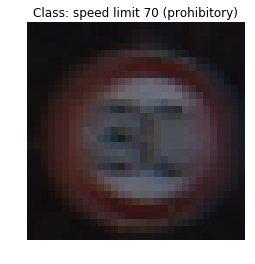

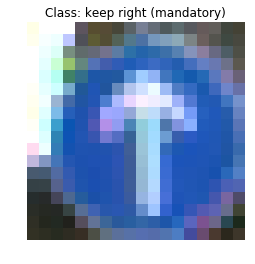

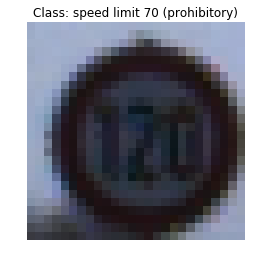

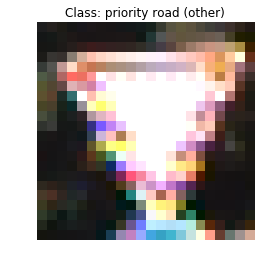

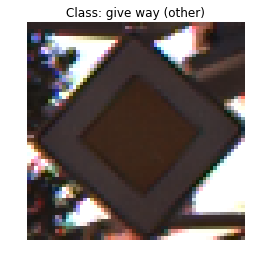

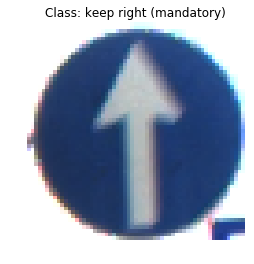

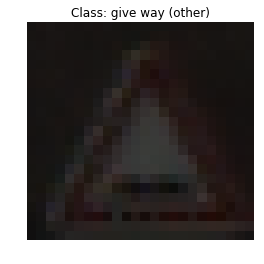

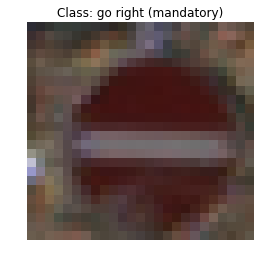

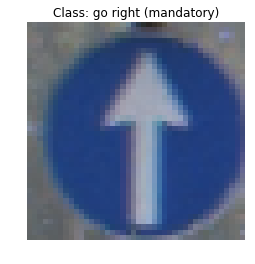

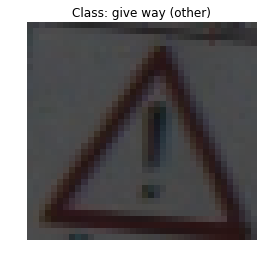

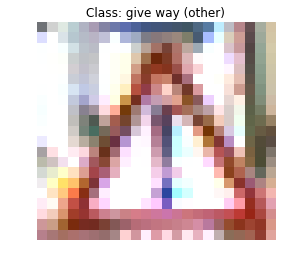

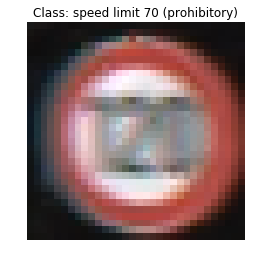

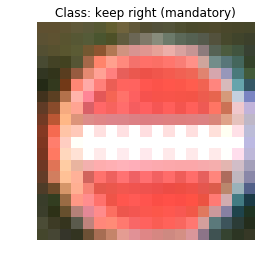

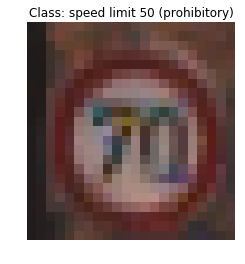

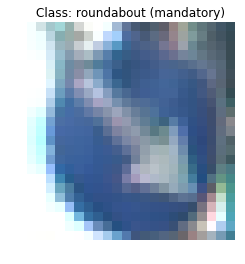

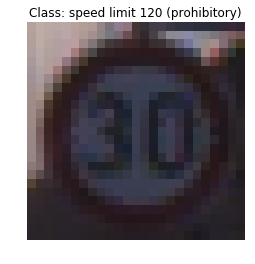

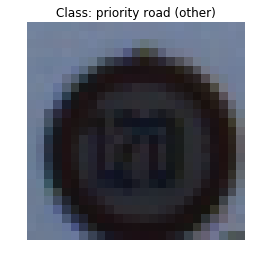

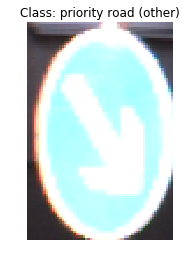

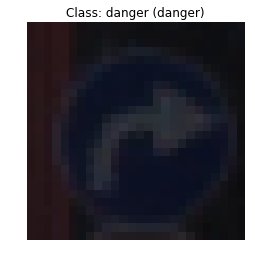

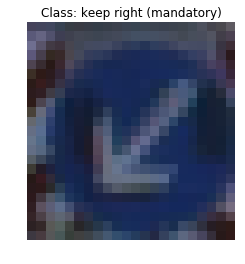

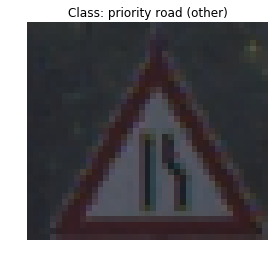

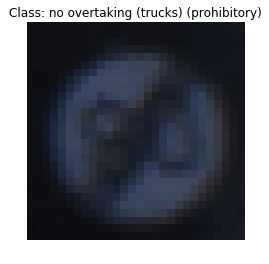

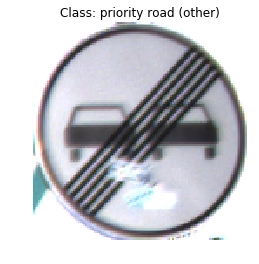

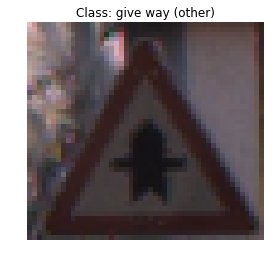

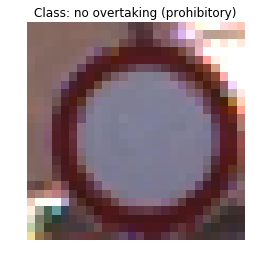

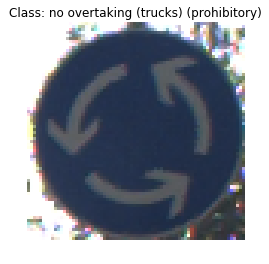

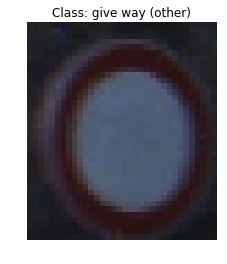

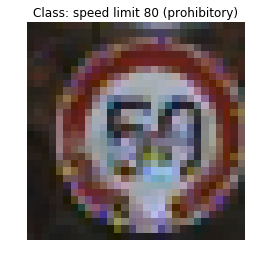

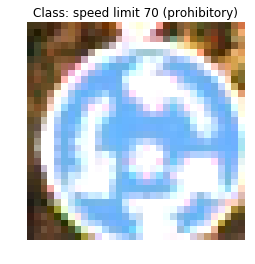

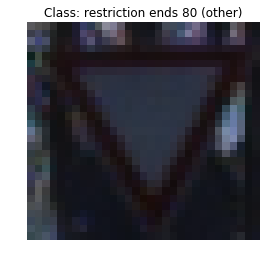

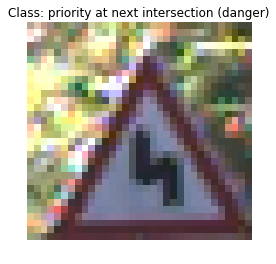

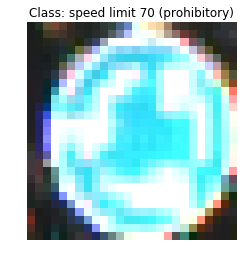

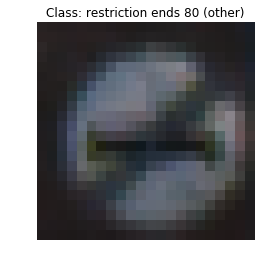

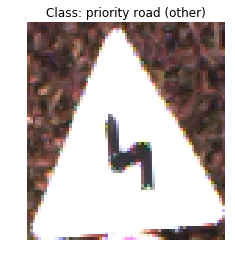

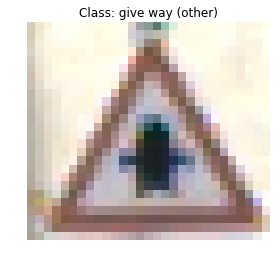

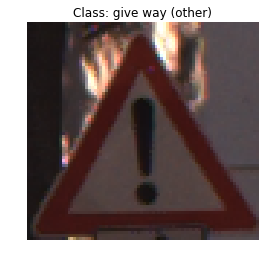

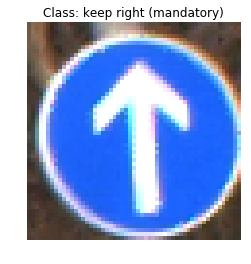

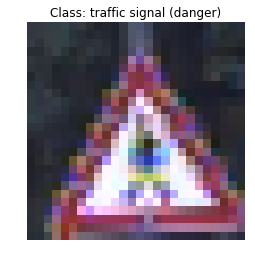

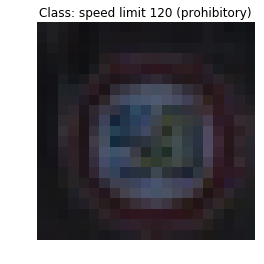

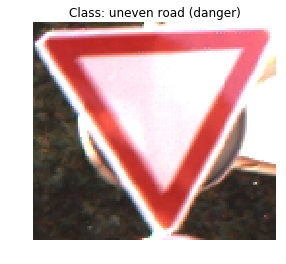

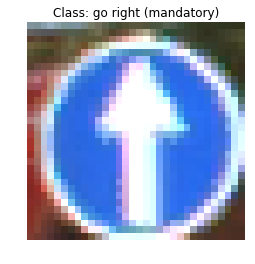

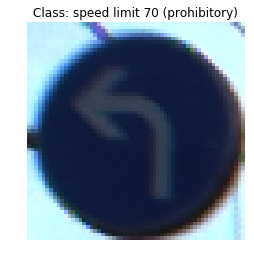

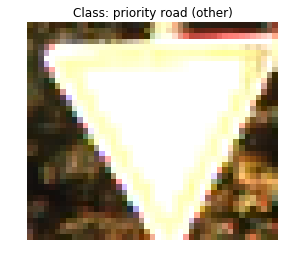

In [8]:
incorrect_preds_slice = preds_data[preds_data['pred'] != preds_data['real']].iloc[:]
show_predictions(incorrect_preds_slice['pred'].values, d_test, incorrect_preds_slice['img_name'])

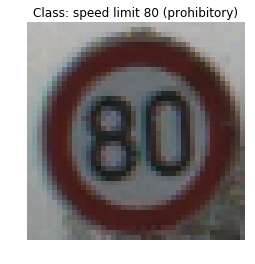

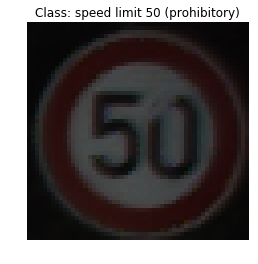

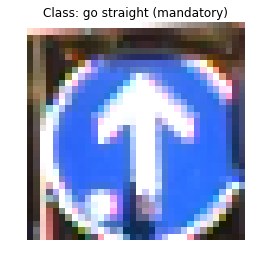

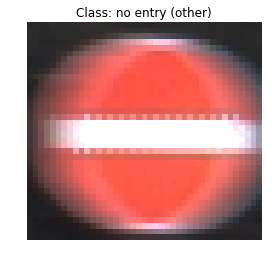

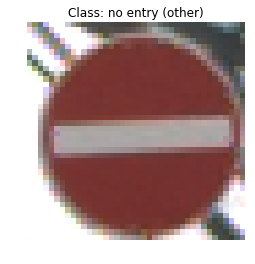

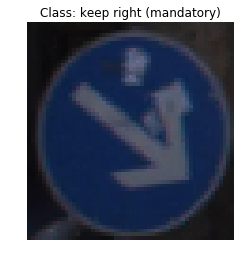

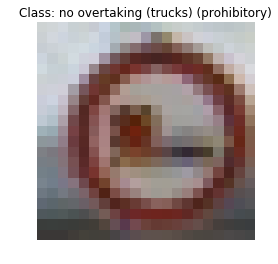

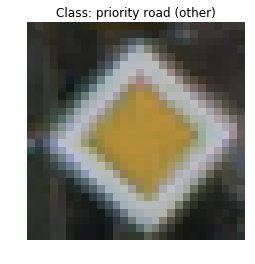

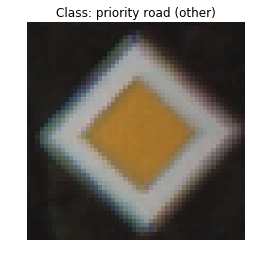

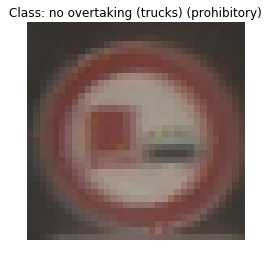

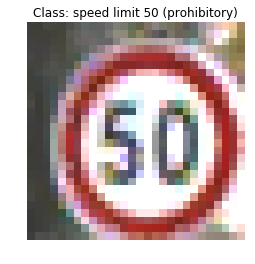

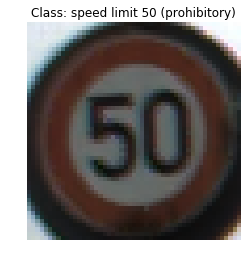

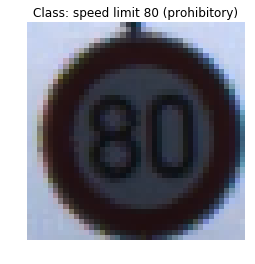

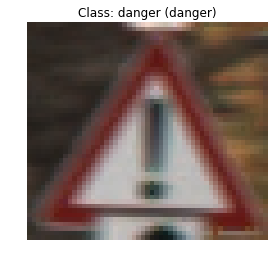

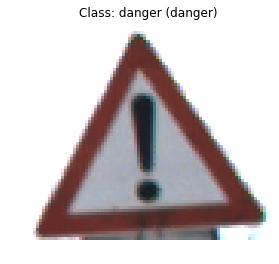

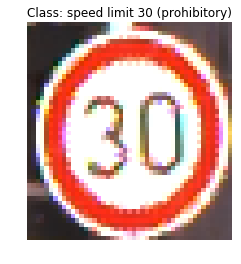

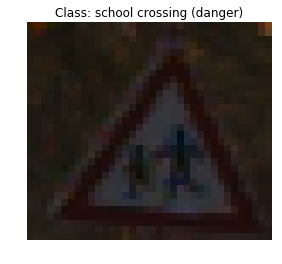

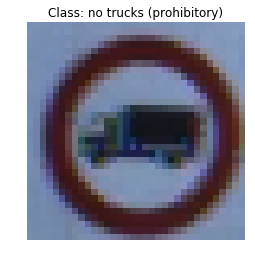

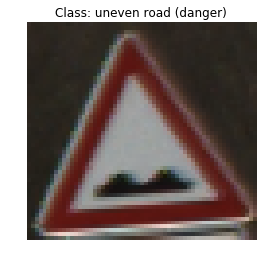

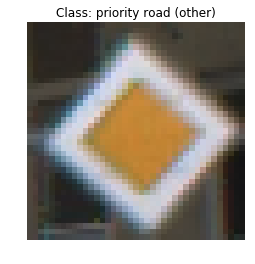

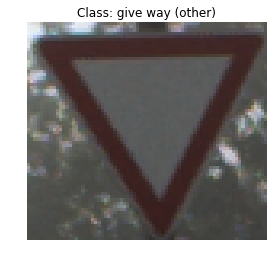

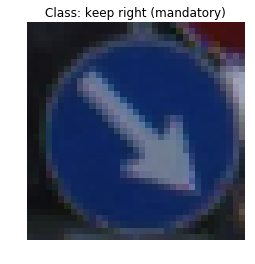

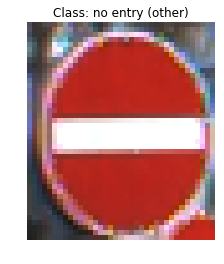

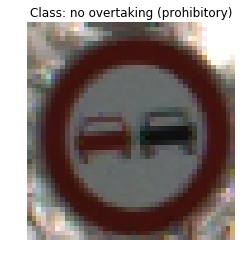

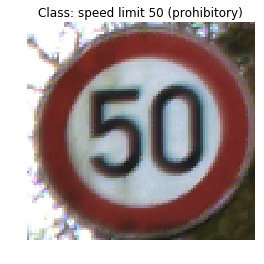

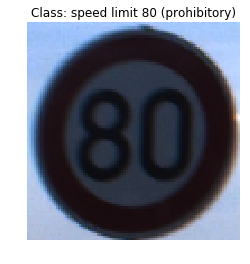

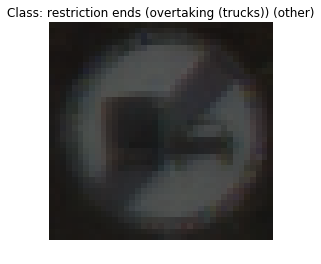

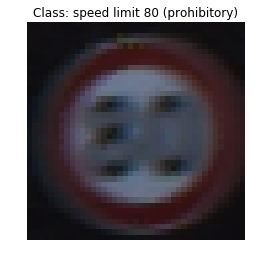

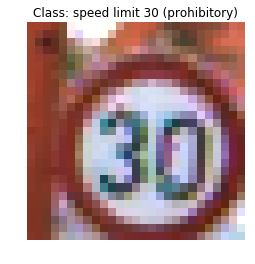

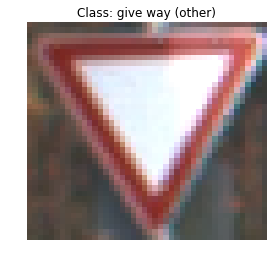

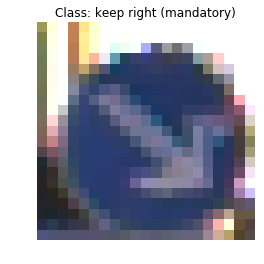

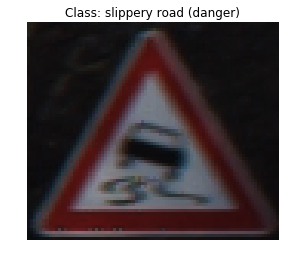

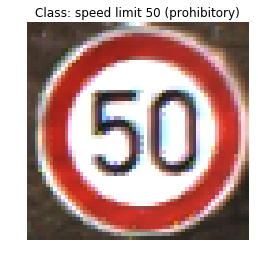

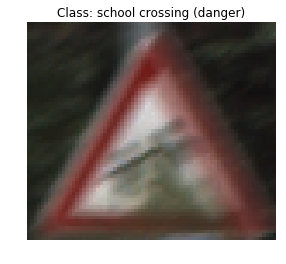

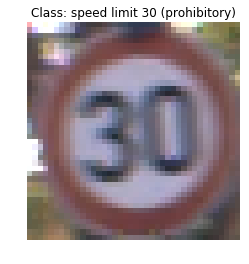

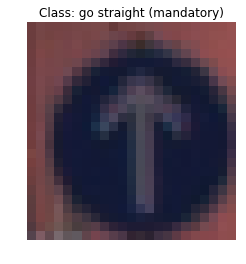

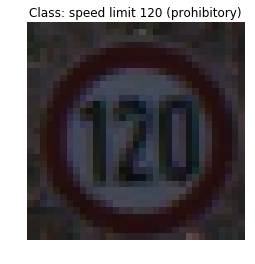

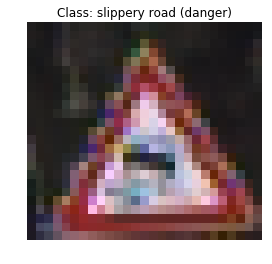

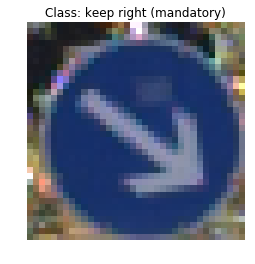

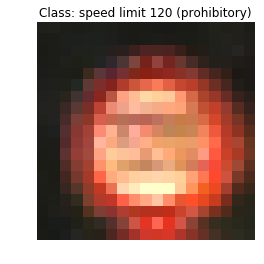

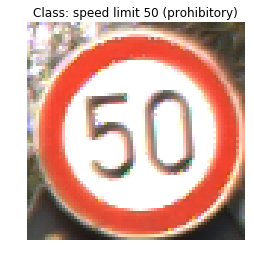

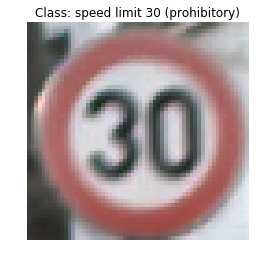

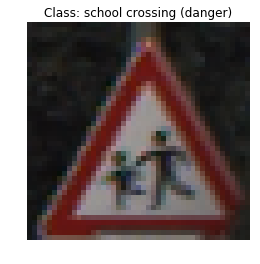

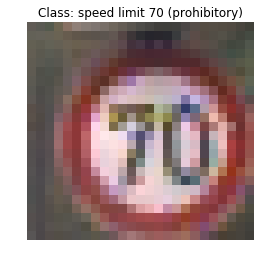

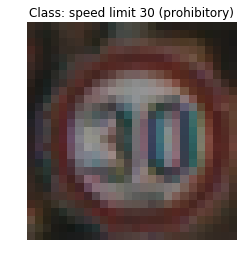

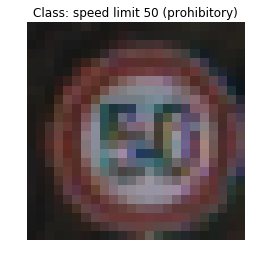

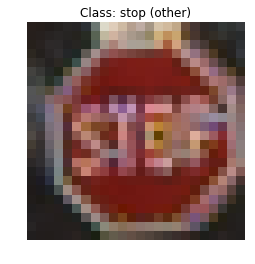

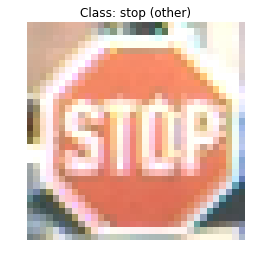

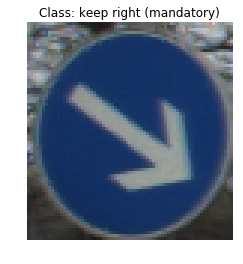

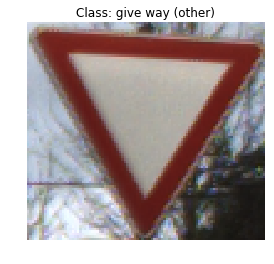

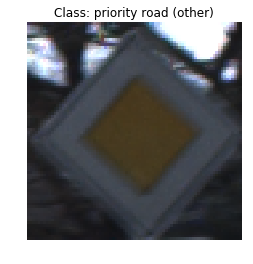

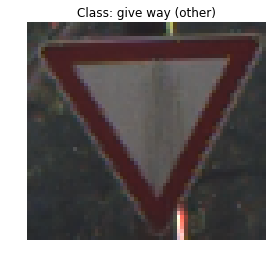

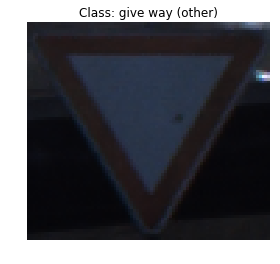

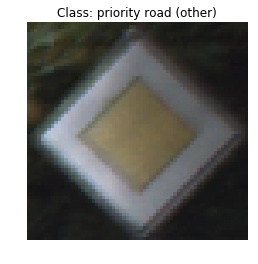

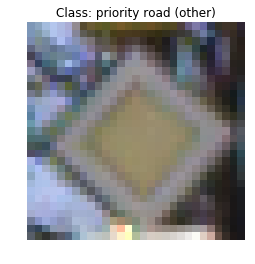

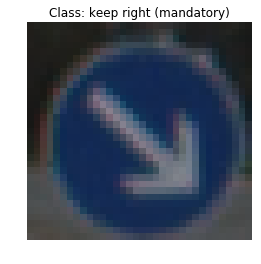

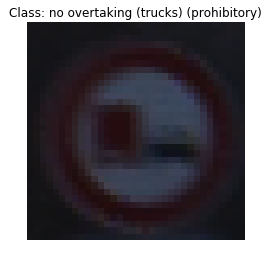

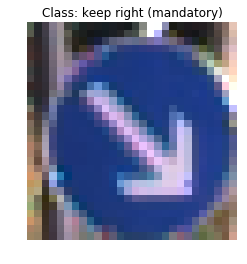

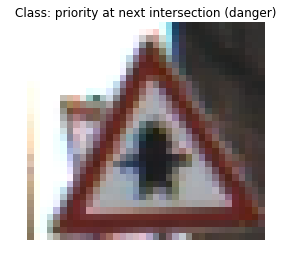

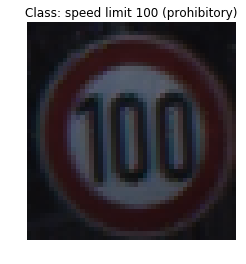

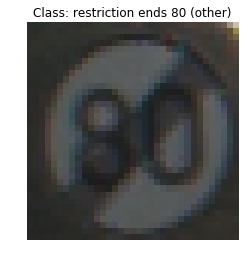

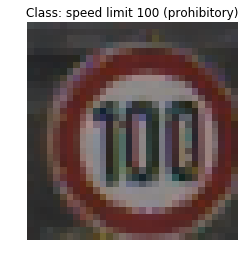

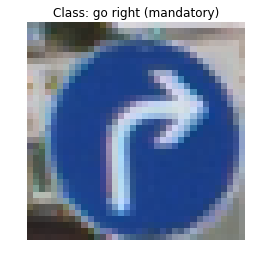

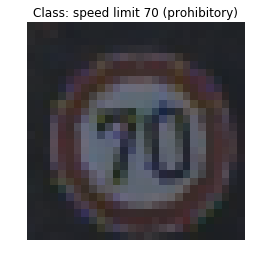

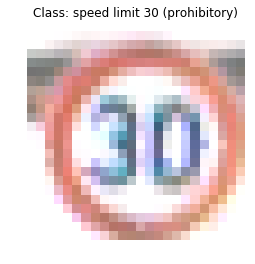

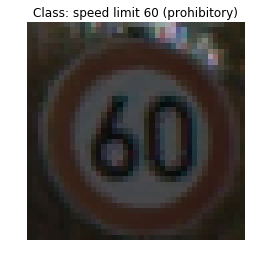

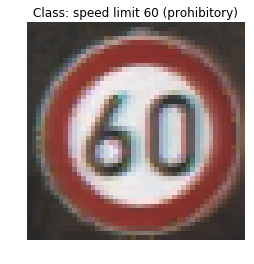

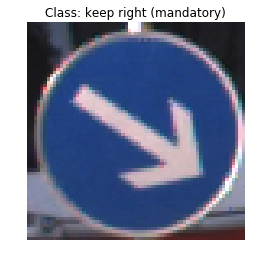

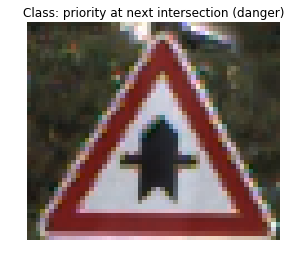

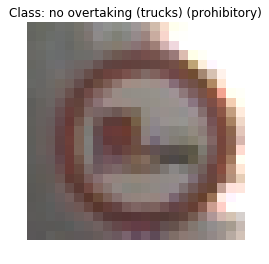

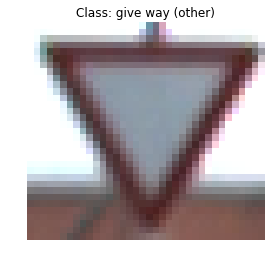

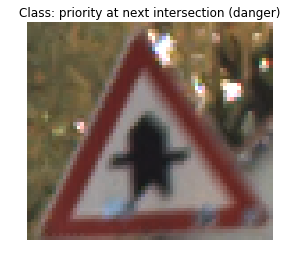

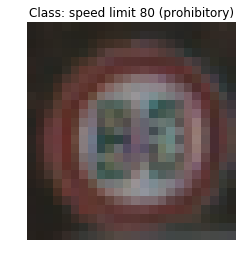

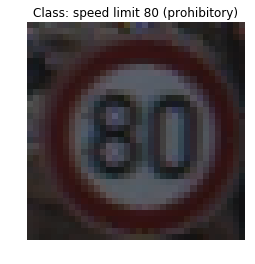

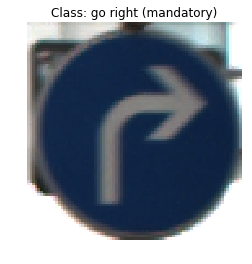

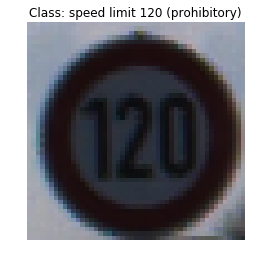

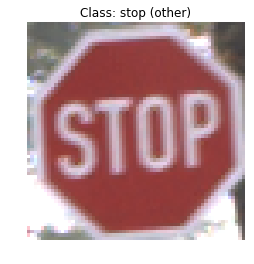

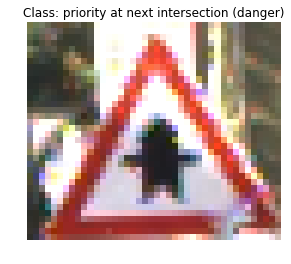

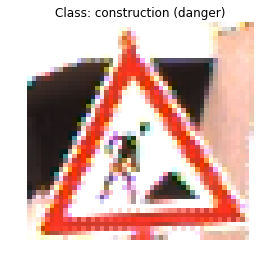

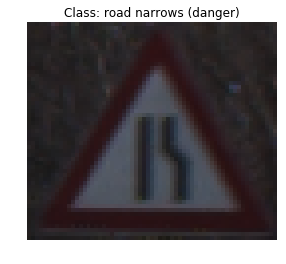

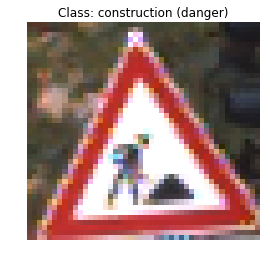

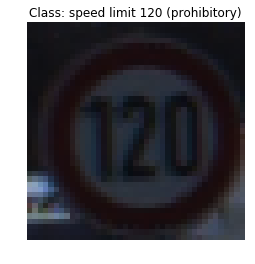

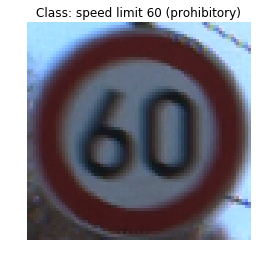

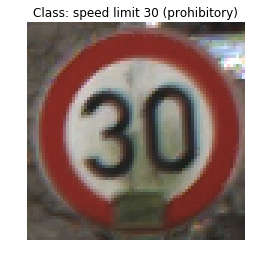

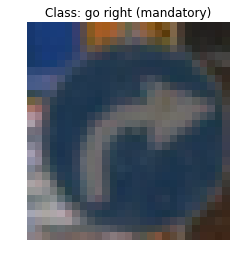

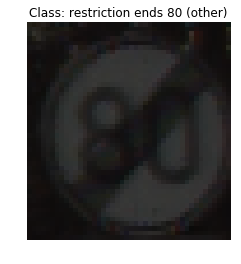

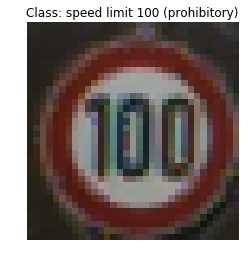

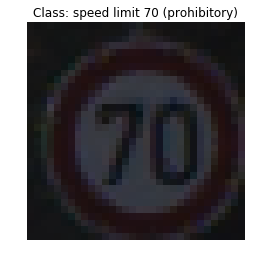

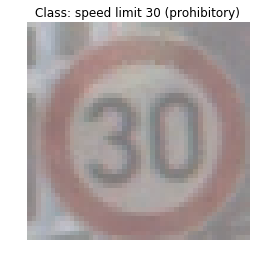

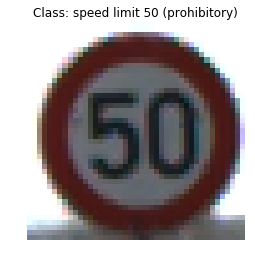

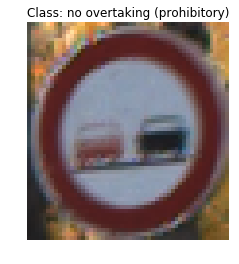

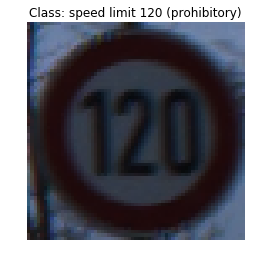

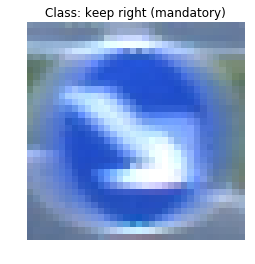

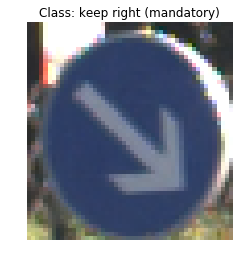

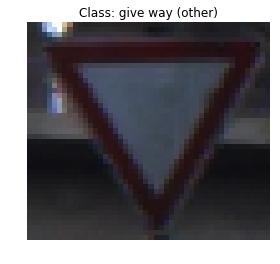

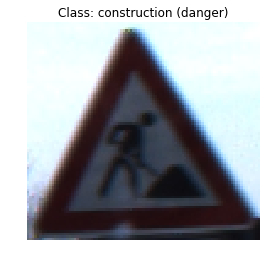

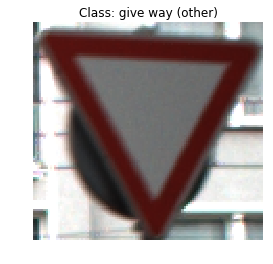

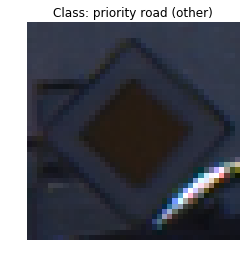

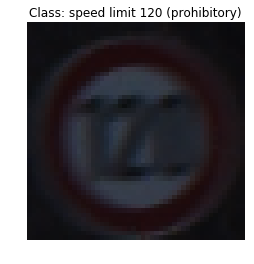

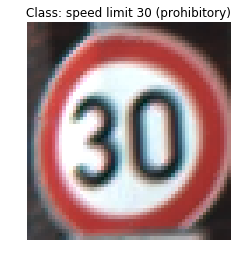

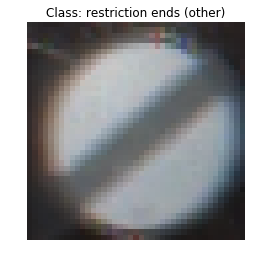

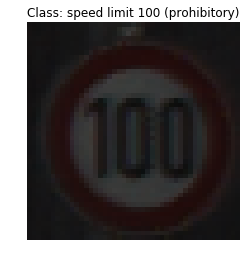

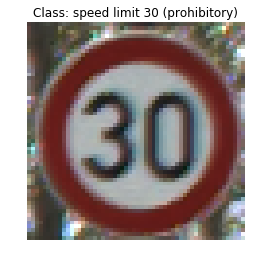

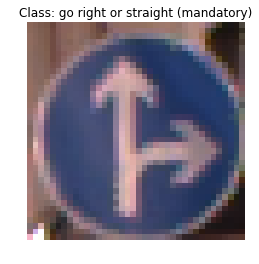

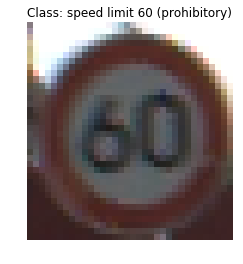

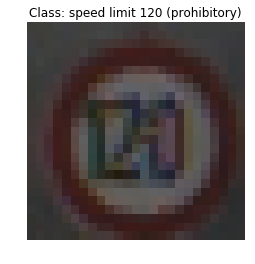

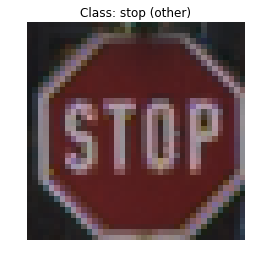

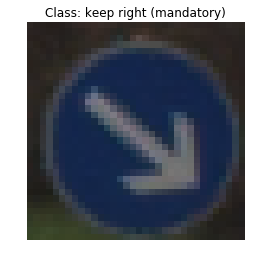

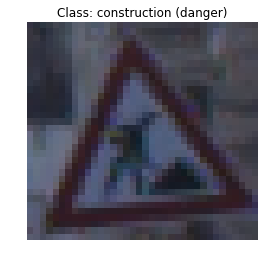

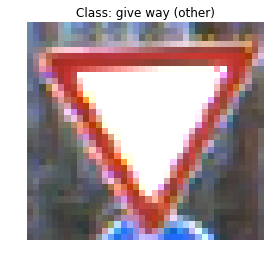

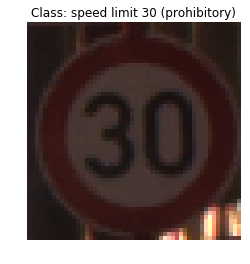

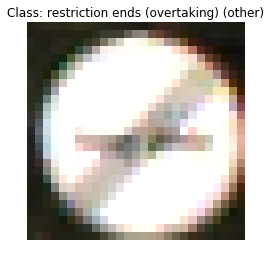

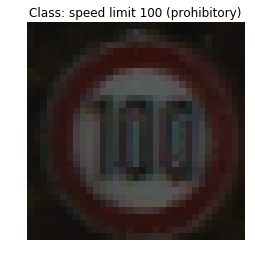

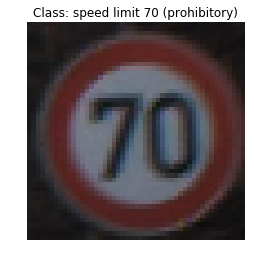

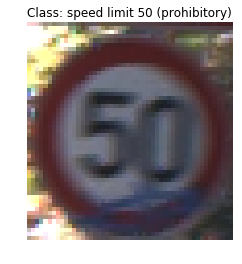

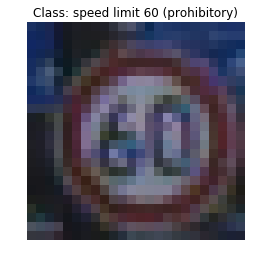

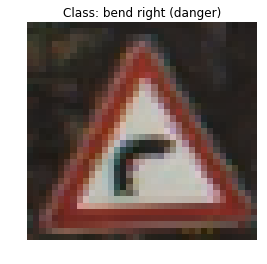

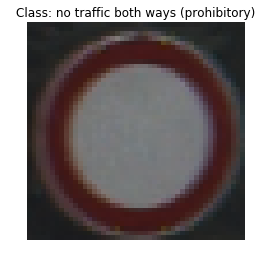

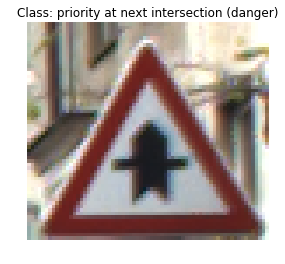

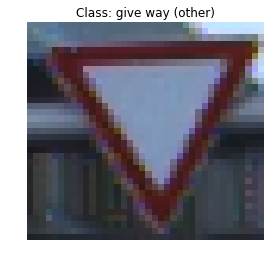

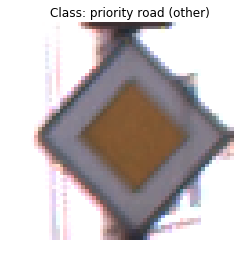

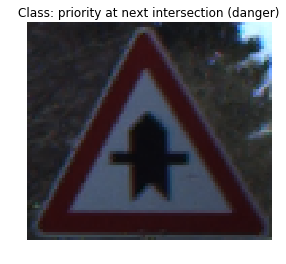

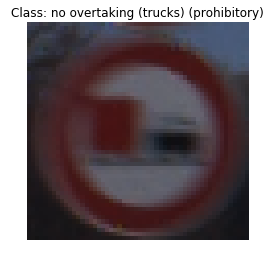

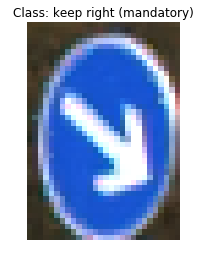

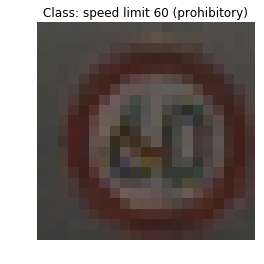

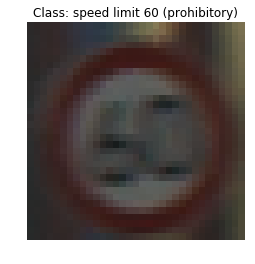

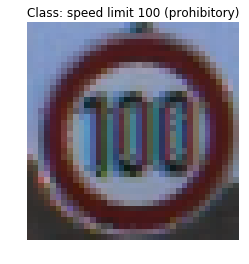

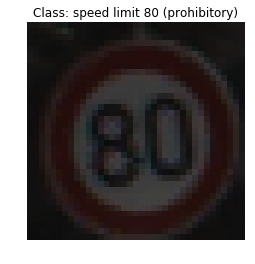

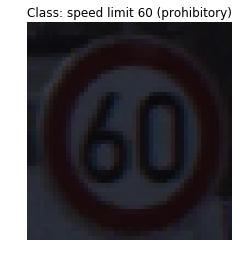

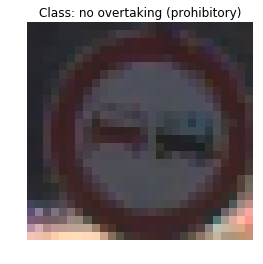

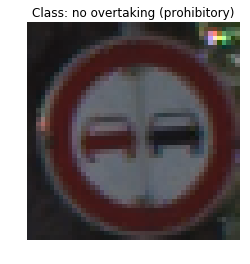

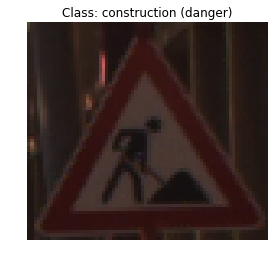

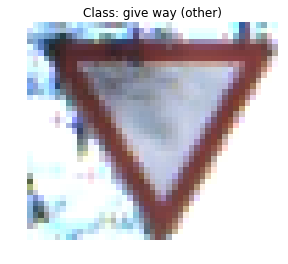

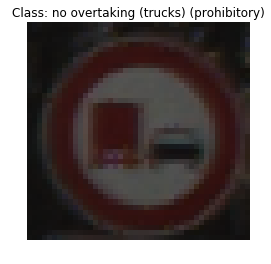

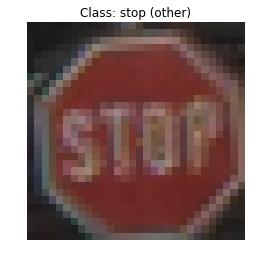

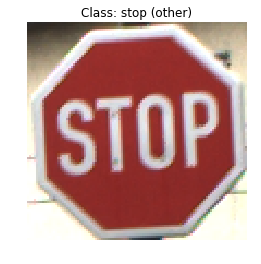

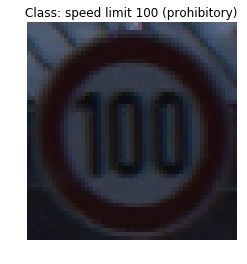

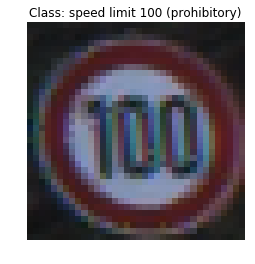

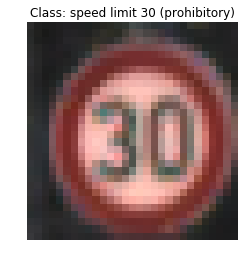

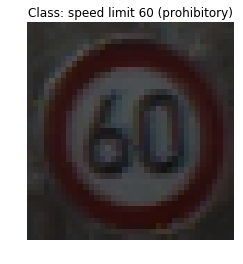

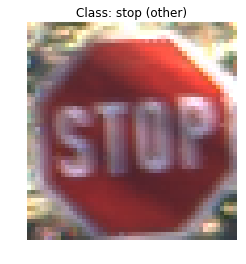

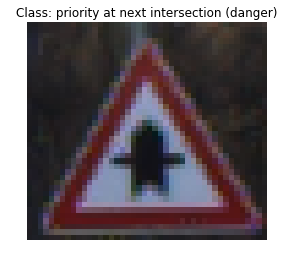

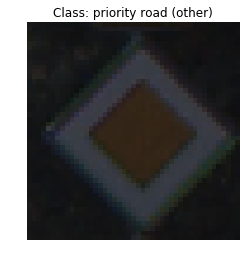

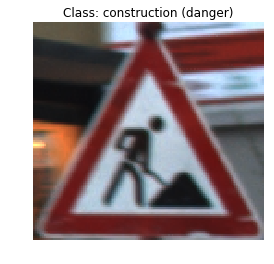

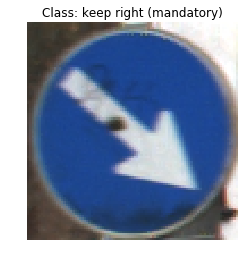

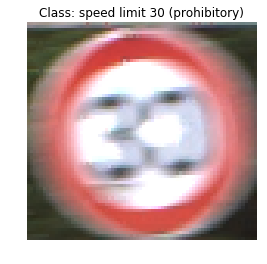

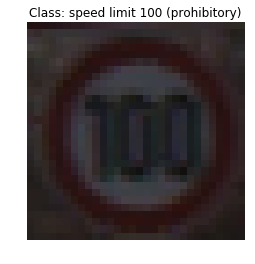

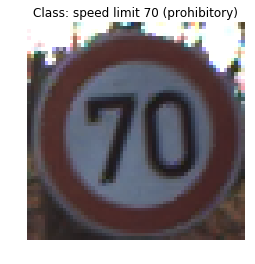

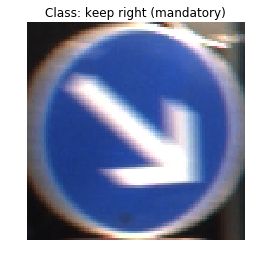

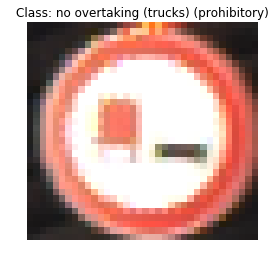

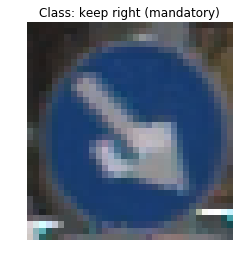

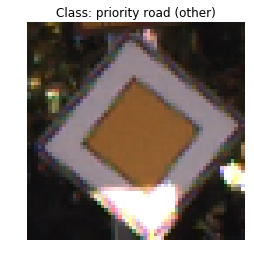

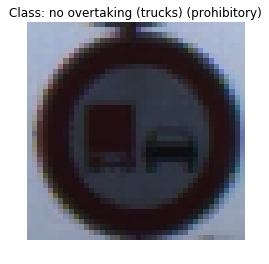

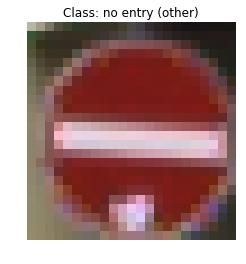

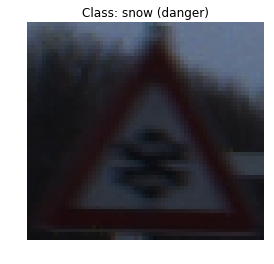

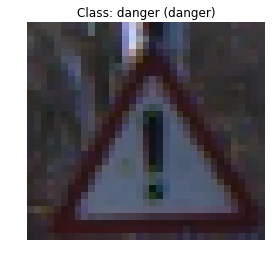

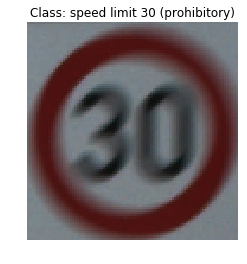

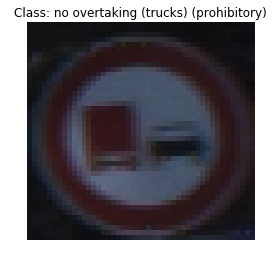

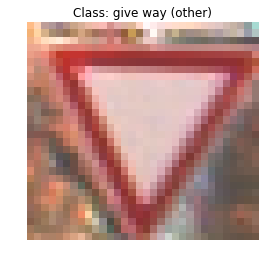

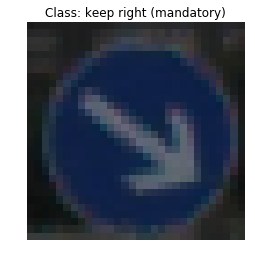

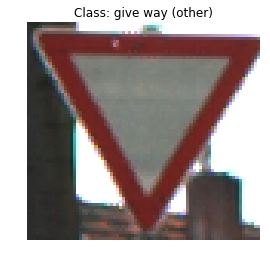

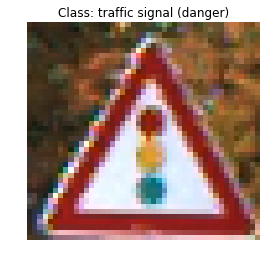

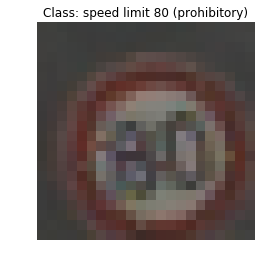

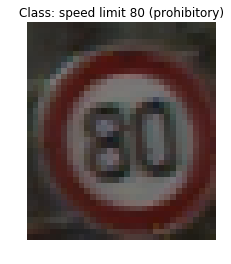

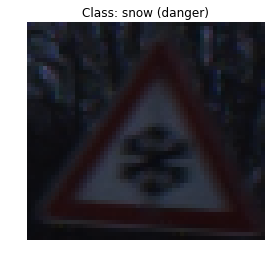

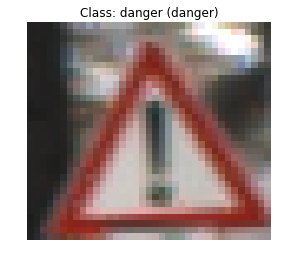

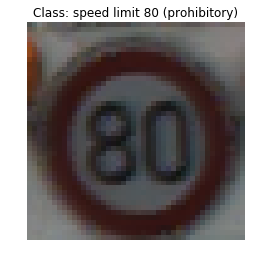

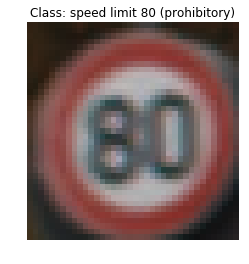

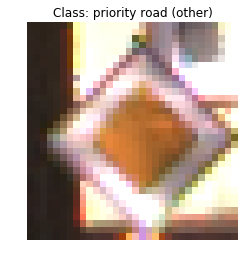

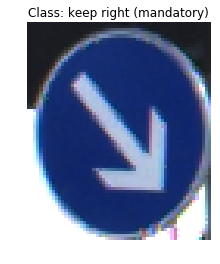

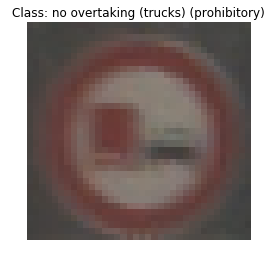

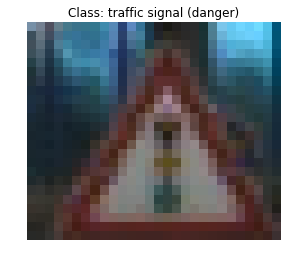

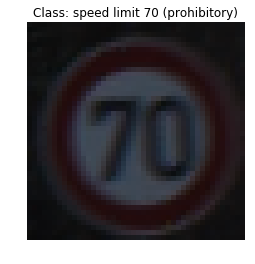

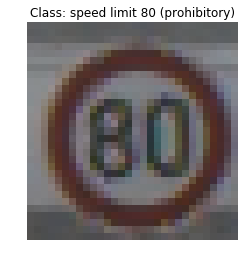

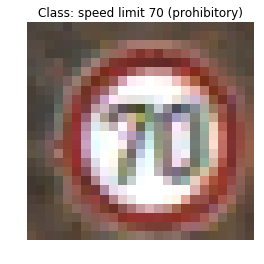

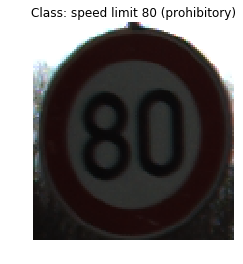

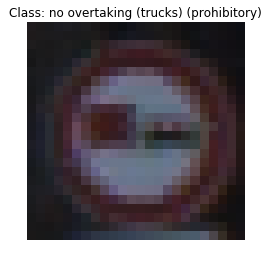

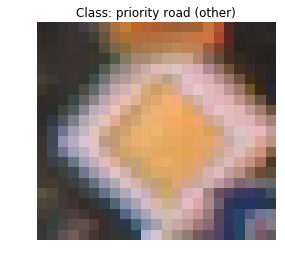

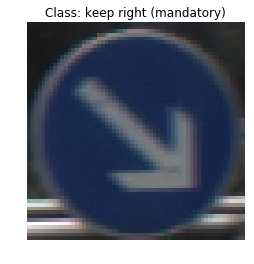

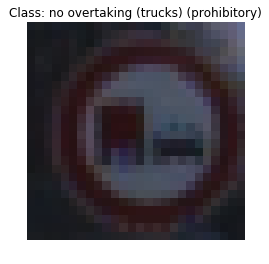

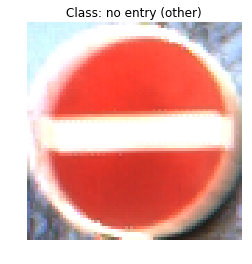

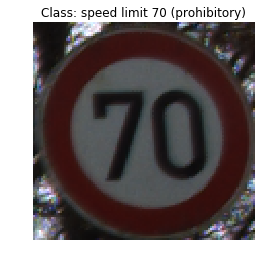

In [9]:
correct_preds_slice = preds_data[preds_data['pred'] == preds_data['real']].iloc[:]
show_predictions(correct_preds_slice['pred'].values, d_test, correct_preds_slice['img_name'])